# Customer churn prediction

Predicting customer churn is about identifying which customers are at high risk of terminating their accounts. For banks, it is important to identify these customers in order to present them with a new offer, for example. This project is about using various algorithms or neural networks to recognize whether a customer has a high risk of canceling the account.

## Dataset Information

- RowNumber — The row number, has no effect on the output. (Has no effect on customer churn)
- CustomerId — The id of the bank customer, it's a random id. (Has no effect on customer churn)
- Surname — The surname of a customer. (Has no effect on customer churn)
- CreditScore — The amount of the credit of the customer. (Can have an effect on customer churn)
- Geography — The country where the customer lives. (Can have an effect on customer churn)
- Gender — The gender of the customer. (Has no effect on customer churn)
- Age — The age of the customer. (This is certainly relevant on customer churn)
- Tenure — The number of years that the customer has been a client of the bank. (This is certainly relevant on customer churn)
- Balance — The balance of the customer. (Very relevant on customer churn)
- NumOfProducts — The number of products that a customer has purchased. (Relevant on customer churn)
- HasCrCard — Has a customer a credit card or not.
- IsActiveMember — Active customers.
- EstimatedSalary — The salary of the customer.
- Exited — Whether or not the customer left the bank. (Label)

### Import of the required libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

### Load the data and display the 5 first rows

In [19]:
data = pd.read_csv("./data/churn.csv")

## Data Analysis

In [20]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
data.shape

(10000, 14)

In [22]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [23]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [25]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [26]:
len(data[data.duplicated()])

0

### Remove columns that are not used for the analysis

In [53]:
data_distplot = data[["CreditScore", "Balance", "EstimatedSalary"]]

### Plot the distrbution and the correlation of th numeric values

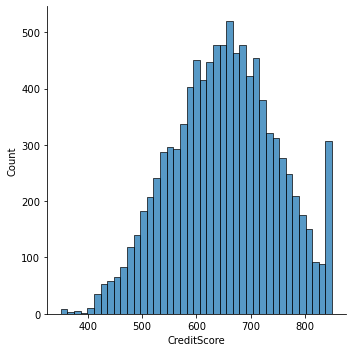

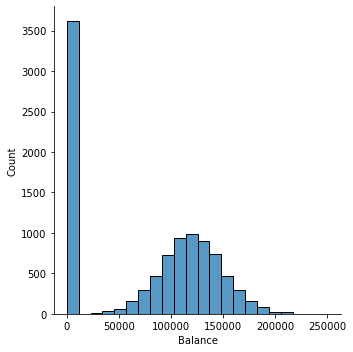

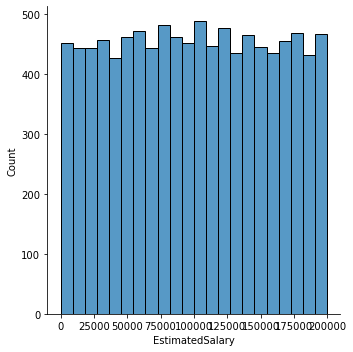

In [54]:
for colmun in data_distplot.columns:
    sns.displot(data_distplot[colmun])

plt.show()

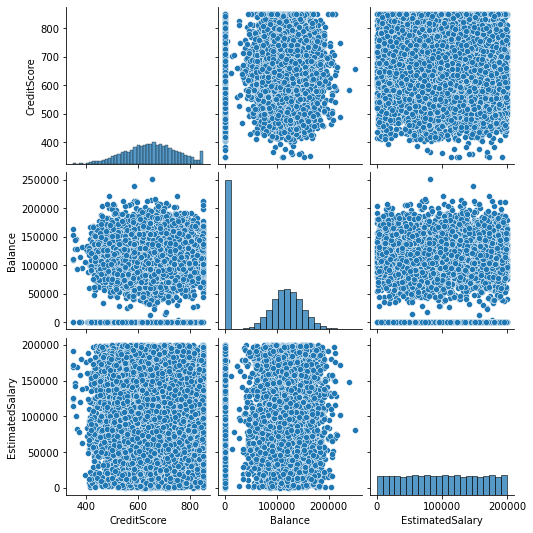

In [55]:
sns.pairplot(data_distplot)
plt.show()

### Checking the balance of the exited label

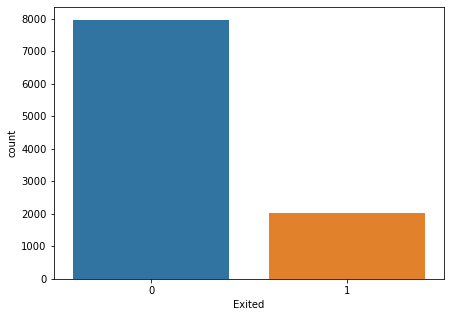

In [46]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x="Exited")
plt.show()

### Check the balance of the gender feature

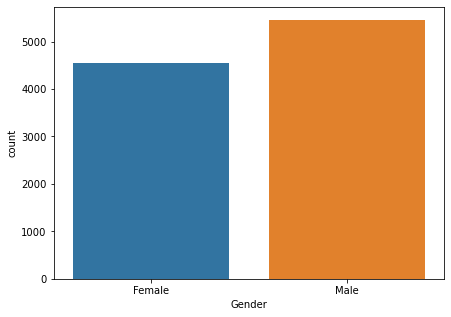

In [84]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x="Gender")
plt.show()

### Check the balance of the geography feature

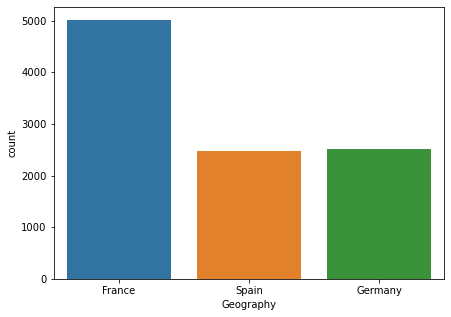

In [85]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x="Geography")
plt.show()

### Check te balance of the HasCrCard feature

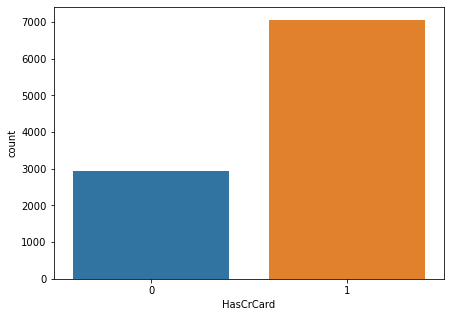

In [86]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x="HasCrCard")
plt.show()

### Check the balance of the IsActiveMember feature

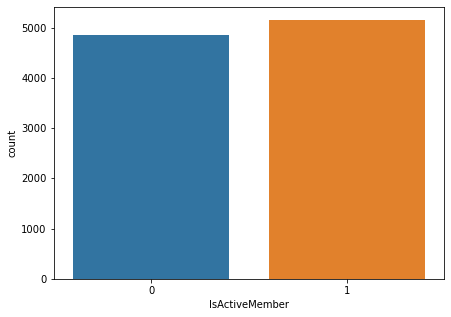

In [87]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x="IsActiveMember")
plt.show()

### Check correlation between independent variables

In [89]:
data_correlation = data.drop(["RowNumber", "CustomerId", "Exited"], axis=1)
data_correlation.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000


### Check correlation between the dependet and independet variable

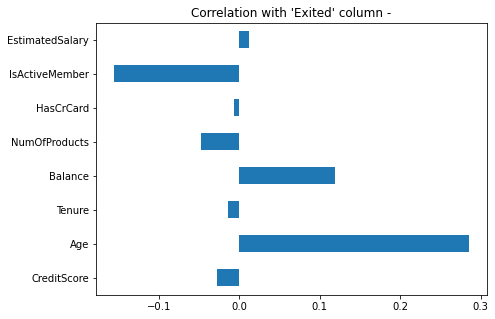

In [90]:
plt.figure(figsize=(7, 5))
data_correlation.corrwith(data["Exited"]).plot(kind="barh", title="Correlation with 'Exited' column")
plt.show()

## Feature engineering